# Magnetic and Diagenetic Analyses of Reilly (2016)
_____

Paper doi: https://doi.org/10.1002/2016GC006627

Core: NBP10-01 JPC-126 (65°53.4′S, 64°41.8′W)

Water depth: 642 m

Data in analysis: Magnetite ppm (from Ms measurements), total organic carbon.

"Mid Bay" includes only core JPC-126. Other cores from this paper plotted in separate file.


In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_fns
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data
magn = pd.read_excel("data/reilly2016/reilly2016-mid.xlsx", sheet_name="Ms")
toc = pd.read_excel("data/reilly2016/reilly2016-mid.xlsx", sheet_name="toc")

# correct depths from cm to m, Ms to magnetite
magn["Depth [mbsf]"] = magn["Depth(cm)"] / 100
magn["Magnetite [ppm]"] = (magn["Ms (Am2/kg)"] * 10**6) / 92
toc["Depth [mbsf]"] = toc["Depth(cm)"] / 100


In [3]:
# combine stuff together
magn_df = pd.DataFrame({"Depth [mbsf]":magn["Depth [mbsf]"], "Magnetite [ppm]":magn["Magnetite [ppm]"]})
toc_df = pd.DataFrame({"Depth [mbsf]":toc["Depth [mbsf]"], "TOC [wt. %]":toc["Calc Wt% (TOC)"]})

comb_df = pd.concat([magn_df, toc_df]).sort_values(by="Depth [mbsf]").reset_index(drop=True)

In [4]:
# interpolate
interpolated = data_fns.interpolate(comb_df, ["TOC [wt. %]"], sed_rates=False)

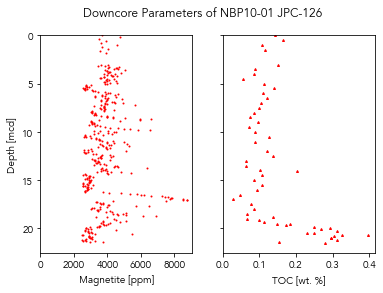

In [5]:
# downcore plots
colors = ["r", "r", "g", "k"]
markers = [".", "^", "x", "<"]
comp_markers = [".", ".", ".", "."]
dc_fig, dc_axs = data_fns.plot_dc(["Magnetite [ppm]", "TOC [wt. %]"], comb_df, colors, markers)
dc_fig.suptitle("Downcore Parameters of NBP10-01 JPC-126", x=0.5)
dc_axs[0].set_ylabel("Depth [mcd]")
dc_fig.savefig("outputs/reilly2016/mid-bay/dc1.pdf", bbox_inches="tight")

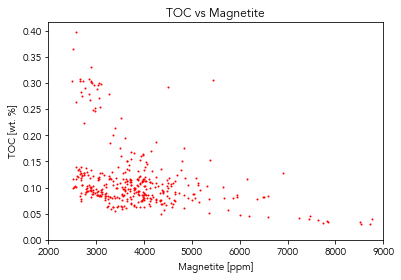

In [6]:
# comparison plots
comp_figs, comp_axs = data_fns.plot_comp(["TOC [wt. %]"], interpolated, ["r", "k"], comp_markers)
comp_axs[0].set(xlabel="Magnetite [ppm]", ylabel="TOC [wt. %]", title="TOC vs Magnetite", xlim=[2000,9000])
comp_axs[0].set_ylim(ymin=0)
comp_figs[0].savefig("outputs/reilly2016/mid-bay/toc-comp.pdf")

In [9]:
# write data to compilations
# first we have to rename the depth columns to mcd instead of mbsf
# we used mbsf above b/c it works nicely with data_fns.py
comb_df.rename(columns={"Depth [mbsf]":"Depth [mcd]"}, inplace=True)
interpolated.rename(columns={"Depth [mbsf]":"Depth [mcd]"}, inplace=True)

In [10]:
data_fns.write_output(comb_df, "NBP10-01 JPC-126", "data/comp_raw.xlsx")
data_fns.write_output(interpolated, "NBP10-01 JPC-126", "data/comp_inter.xlsx")